# **Projet Clustering et Modèles de mélange** 
# **Annexe Auto-encodeurs  (question12)**

Antoine RODRIGUEZ

Douaa BENHADDOUCHE

Lilia HARIRECHE


In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
!gdown --id 19hYq2X7leym9KlVR1ipjSt1eQLVq6m2A
!unzip datasets.zip

Downloading...
From: https://drive.google.com/uc?id=19hYq2X7leym9KlVR1ipjSt1eQLVq6m2A
To: /content/datasets.zip
8.56MB [00:00, 39.9MB/s]
Archive:  datasets.zip
  inflating: jaffe.csv               
  inflating: MFEA.csv                
  inflating: MNIST.csv               
  inflating: optidigits.csv          
  inflating: USPS.csv                


In [ ]:
jaffe = pd.read_csv('jaffe.csv')
MFEA = pd.read_csv('MFEA.csv')
MNIST = pd.read_csv('MNIST.csv')
USPS = pd.read_csv('USPS.csv')
optidigits = pd.read_csv('optidigits.csv')

## **JAFFE**

In [ ]:
# sauvegarde des labels de classes
labels = jaffe.pop('class')

# centrer et réduire les tableaux
std = StandardScaler()
jaffe = std.fit_transform(jaffe)  # np.ndarray

In [ ]:
X_train, X_test = train_test_split(jaffe, test_size=0.2, random_state=42)

In [ ]:
EPOCHS = 100

# modèle diabolo
model = keras.models.Sequential() 
model.add(keras.layers.Dense(500,  activation='relu', input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(250,  activation='relu'))
model.add(keras.layers.Dense(2,    activation='linear', name="hidden"))
model.add(keras.layers.Dense(250,  activation='relu'))
model.add(keras.layers.Dense(500,  activation='relu'))
model.add(keras.layers.Dense(X_train.shape[1],  activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer = keras.optimizers.Adam())

history = model.fit(X_train, X_train, batch_size=32, verbose=0,
                    epochs=EPOCHS, validation_data=(X_test, X_test))

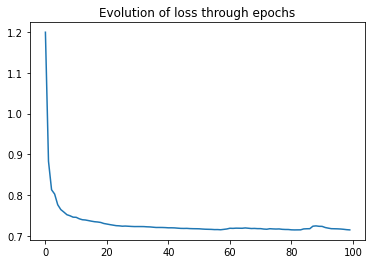

In [ ]:
figure = plt.plot(history.history['loss'])
figure = plt.title('Evolution of loss through epochs')

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 500)               338500    
_________________________________________________________________
dense_68 (Dense)             (None, 250)               125250    
_________________________________________________________________
hidden (Dense)               (None, 2)                 502       
_________________________________________________________________
dense_69 (Dense)             (None, 250)               750       
_________________________________________________________________
dense_70 (Dense)             (None, 500)               125500    
_________________________________________________________________
dense_71 (Dense)             (None, 676)               338676    
Total params: 929,178
Trainable params: 929,178
Non-trainable params: 0
_______________________________________________

In [ ]:
# récupération de l'autoencodeur
auto_encoder = keras.models.Model(model.input, model.get_layer('hidden').output) 

In [ ]:
auto_encoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67_input (InputLayer)  [(None, 676)]             0         
_________________________________________________________________
dense_67 (Dense)             (None, 500)               338500    
_________________________________________________________________
dense_68 (Dense)             (None, 250)               125250    
_________________________________________________________________
hidden (Dense)               (None, 2)                 502       
Total params: 464,252
Trainable params: 464,252
Non-trainable params: 0
_________________________________________________________________


In [ ]:
reduc_jaffe = auto_encoder.predict(jaffe)  # dataset reduit en n=2

In [ ]:
reduc_jaffe = pd.DataFrame(reduc_jaffe, columns=['x1','x2'])
reduc_jaffe['class'] = labels

In [ ]:
reduc_jaffe.to_csv('reduc_jaffe.csv', sep=",", decimal='.', index=False)

## **MNIST**


In [ ]:
# sauvegarde des labels de classes
labels = MNIST.pop('class')

# centrer et réduire les tableaux
std = StandardScaler()
MNIST = std.fit_transform(MNIST)  # np.ndarray

In [ ]:
X_train, X_test = train_test_split(MNIST, test_size=0.2, random_state=42)

In [ ]:
EPOCHS = 100

# modèle diabolo
model = keras.models.Sequential() 
model.add(keras.layers.Dense(500,  activation='relu', input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(250,  activation='relu'))
model.add(keras.layers.Dense(2,    activation='linear', name="hidden"))
model.add(keras.layers.Dense(250,  activation='relu'))
model.add(keras.layers.Dense(500,  activation='relu'))
model.add(keras.layers.Dense(X_train.shape[1],  activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer = keras.optimizers.Adam())

history = model.fit(X_train, X_train, batch_size=256, verbose=0,
                    epochs=EPOCHS, validation_data=(X_test, X_test))

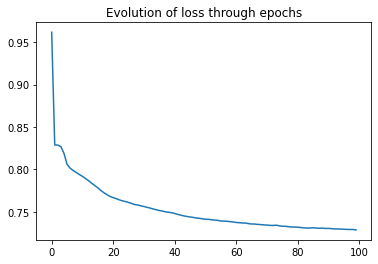

In [ ]:
figure = plt.plot(history.history['loss'])
figure = plt.title('Evolution of loss through epochs')

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_63 (Dense)             (None, 250)               125250    
_________________________________________________________________
hidden (Dense)               (None, 2)                 502       
_________________________________________________________________
dense_64 (Dense)             (None, 250)               750       
_________________________________________________________________
dense_65 (Dense)             (None, 500)               125500    
_________________________________________________________________
dense_66 (Dense)             (None, 784)               392784    
Total params: 1,037,286
Trainable params: 1,037,286
Non-trainable params: 0
___________________________________________

In [ ]:
# récupération de l'autoencodeur
auto_encoder = keras.models.Model(model.input, model.get_layer('hidden').output) 

In [ ]:
auto_encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62_input (InputLayer)  [(None, 784)]             0         
_________________________________________________________________
dense_62 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_63 (Dense)             (None, 250)               125250    
_________________________________________________________________
hidden (Dense)               (None, 2)                 502       
Total params: 518,252
Trainable params: 518,252
Non-trainable params: 0
_________________________________________________________________


In [ ]:
reduc = auto_encoder.predict(MNIST)  # dataset reduit en n=2

In [ ]:
reduc = pd.DataFrame(reduc, columns=['x1','x2'])
reduc['class'] = labels

In [ ]:
reduc.to_csv('reduc_MNIST.csv', sep=",", decimal='.',index=False)

## **MFEA**

In [ ]:
# sauvegarde des labels de classes
labels = MFEA.pop('class')

# centrer et réduire les tableaux
std = StandardScaler()
MFEA = std.fit_transform(MFEA)  # np.ndarray

In [ ]:
X_train, X_test = train_test_split(MFEA, test_size=0.2, random_state=42)

In [ ]:
EPOCHS = 100

# modèle diabolo
model = keras.models.Sequential() 
model.add(keras.layers.Dense(500,  activation='relu', input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(250,  activation='relu'))
model.add(keras.layers.Dense(2,    activation='linear', name="hidden"))
model.add(keras.layers.Dense(250,  activation='relu'))
model.add(keras.layers.Dense(500,  activation='relu'))
model.add(keras.layers.Dense(X_train.shape[1],  activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer = keras.optimizers.Adam())

history = model.fit(X_train, X_train, batch_size=256, verbose=1,
                    epochs=EPOCHS, validation_data=(X_test, X_test))

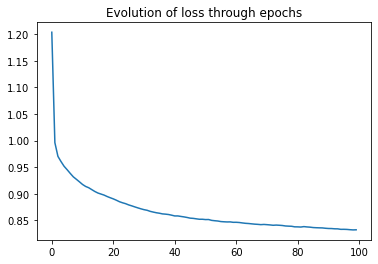

In [ ]:
figure = plt.plot(history.history['loss'])
figure = plt.title('Evolution of loss through epochs')

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 500)               120500    
_________________________________________________________________
dense_73 (Dense)             (None, 250)               125250    
_________________________________________________________________
hidden (Dense)               (None, 2)                 502       
_________________________________________________________________
dense_74 (Dense)             (None, 250)               750       
_________________________________________________________________
dense_75 (Dense)             (None, 500)               125500    
_________________________________________________________________
dense_76 (Dense)             (None, 240)               120240    
Total params: 492,742
Trainable params: 492,742
Non-trainable params: 0
_______________________________________________

In [ ]:
# récupération de l'autoencodeur
auto_encoder = keras.models.Model(model.input, model.get_layer('hidden').output) 

In [ ]:
auto_encoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72_input (InputLayer)  [(None, 240)]             0         
_________________________________________________________________
dense_72 (Dense)             (None, 500)               120500    
_________________________________________________________________
dense_73 (Dense)             (None, 250)               125250    
_________________________________________________________________
hidden (Dense)               (None, 2)                 502       
Total params: 246,252
Trainable params: 246,252
Non-trainable params: 0
_________________________________________________________________


In [ ]:
reduc = auto_encoder.predict(MFEA)  # dataset reduit en n=2

In [ ]:
reduc = pd.DataFrame(reduc, columns=['x1','x2'])
reduc['class'] = labels

In [ ]:
reduc.to_csv('reduc_MFEA.csv', sep=",", decimal='.', index=False)

## **USPS**

In [ ]:
# sauvegarde des labels de classes
labels = USPS.pop('class')

# centrer et réduire les tableaux
std = StandardScaler()
USPS = std.fit_transform(USPS)  # np.ndarray

In [ ]:
X_train, X_test = train_test_split(USPS, test_size=0.2, random_state=42)

In [ ]:
EPOCHS = 100

# modèle diabolo
model = keras.models.Sequential() 
model.add(keras.layers.Dense(500,  activation='relu', input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(250,  activation='relu'))
model.add(keras.layers.Dense(2,    activation='linear', name="hidden"))
model.add(keras.layers.Dense(250,  activation='relu'))
model.add(keras.layers.Dense(500,  activation='relu'))
model.add(keras.layers.Dense(X_train.shape[1],  activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer = keras.optimizers.Adam())

history = model.fit(X_train, X_train, batch_size=512, verbose=0,
                    epochs=EPOCHS, validation_data=(X_test, X_test))

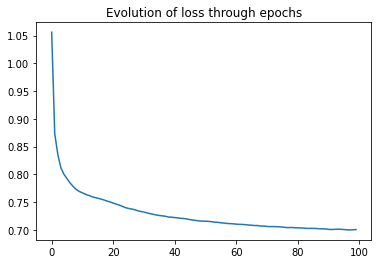

In [ ]:
figure = plt.plot(history.history['loss'])
figure = plt.title('Evolution of loss through epochs')

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 500)               128500    
_________________________________________________________________
dense_78 (Dense)             (None, 250)               125250    
_________________________________________________________________
hidden (Dense)               (None, 2)                 502       
_________________________________________________________________
dense_79 (Dense)             (None, 250)               750       
_________________________________________________________________
dense_80 (Dense)             (None, 500)               125500    
_________________________________________________________________
dense_81 (Dense)             (None, 256)               128256    
Total params: 508,758
Trainable params: 508,758
Non-trainable params: 0
_______________________________________________

In [ ]:
# récupération de l'autoencodeur
auto_encoder = keras.models.Model(model.input, model.get_layer('hidden').output) 

In [ ]:
auto_encoder.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77_input (InputLayer)  [(None, 256)]             0         
_________________________________________________________________
dense_77 (Dense)             (None, 500)               128500    
_________________________________________________________________
dense_78 (Dense)             (None, 250)               125250    
_________________________________________________________________
hidden (Dense)               (None, 2)                 502       
Total params: 254,252
Trainable params: 254,252
Non-trainable params: 0
_________________________________________________________________


In [ ]:
reduc = auto_encoder.predict(USPS)  # dataset reduit en n=2

In [ ]:
reduc = pd.DataFrame(reduc, columns=['x1','x2'])
reduc['class'] = labels

In [ ]:
reduc.to_csv('reduc_USPS.csv', sep=",", decimal='.', index=False)

## **Optidigits**

In [ ]:
# sauvegarde des labels de classes
labels = optidigits.pop('class')

# centrer et réduire les tableaux
std = StandardScaler()
optidigits = std.fit_transform(optidigits)  # np.ndarray

In [ ]:
X_train, X_test = train_test_split(optidigits, test_size=0.2, random_state=42)

In [ ]:
EPOCHS = 200

# modèle diabolo
model = keras.models.Sequential() 
model.add(keras.layers.Dense(500,  activation='relu', input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(250,  activation='relu'))
model.add(keras.layers.Dense(2,    activation='linear', name="hidden"))
model.add(keras.layers.Dense(250,  activation='relu'))
model.add(keras.layers.Dense(500,  activation='relu'))
model.add(keras.layers.Dense(X_train.shape[1],  activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer = keras.optimizers.Adam())

history = model.fit(X_train, X_train, batch_size=512, verbose=0,
                    epochs=EPOCHS, validation_data=(X_test, X_test))

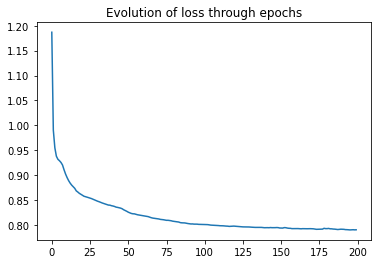

In [ ]:
figure = plt.plot(history.history['loss'])
figure = plt.title('Evolution of loss through epochs')

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 500)               32500     
_________________________________________________________________
dense_83 (Dense)             (None, 250)               125250    
_________________________________________________________________
hidden (Dense)               (None, 2)                 502       
_________________________________________________________________
dense_84 (Dense)             (None, 250)               750       
_________________________________________________________________
dense_85 (Dense)             (None, 500)               125500    
_________________________________________________________________
dense_86 (Dense)             (None, 64)                32064     
Total params: 316,566
Trainable params: 316,566
Non-trainable params: 0
_______________________________________________

In [ ]:
# récupération de l'autoencodeur
auto_encoder = keras.models.Model(model.input, model.get_layer('hidden').output) 

In [ ]:
auto_encoder.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82_input (InputLayer)  [(None, 64)]              0         
_________________________________________________________________
dense_82 (Dense)             (None, 500)               32500     
_________________________________________________________________
dense_83 (Dense)             (None, 250)               125250    
_________________________________________________________________
hidden (Dense)               (None, 2)                 502       
Total params: 158,252
Trainable params: 158,252
Non-trainable params: 0
_________________________________________________________________


In [ ]:
reduc = auto_encoder.predict(optidigits)  # dataset reduit en n=2

In [ ]:
reduc = pd.DataFrame(reduc, columns=['x1','x2'])
reduc['class'] = labels

In [ ]:
reduc.to_csv('reduc_optidigits.csv', sep=",", decimal='.', index=False)